# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

[квантиль нормального распределиня, (Таблица 11, стр. 55)](http://lnfm1.sai.msu.ru/neb/kaf/MON/SazhinaOS_MON-2020.pdf)  
[кванитиль нормального распределения без таблиц](https://answer-id.com/ru/57506688)


[Лекция-5-доверительные-интервалы](https://mse.msu.ru/wp-content/uploads/2020/03/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F-5-%D0%B4%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%D1%8B.pdf)



In [1]:
from scipy.stats import norm

### Ваши код/вычисления...
sigma = 225**0.5
delta = 3
beta = 0.95
alpha = 1 - beta

Z = norm.ppf(1 - alpha/2)

n = round(((Z * sigma) / delta)**2)
n

96

In [2]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [3]:
beta = 0.98
n = 25
mean = 130
sigma = 15

### Ваши код/вычисления...
alpha = 1 - beta
Z = norm.ppf(1 - alpha / 2)
delta = round((sigma * Z) / n**0.5)

left = mean - delta
right = mean + delta
print(f'{left}<{mean}<{right}')

L = right - left #....  #Запишите в эту переменную ваш высчитанный ответ!
L

123<130<137


14

In [4]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [5]:
import scipy.stats as stats


# здесь наверное ошибка в указании параметров
population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165
# так правильнее?
population_men  = stats.norm.rvs(loc=171, scale=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=165, scale=16, size=12000)  # Выборка женщин со средним ростом 165

H0: средний рост мужчин и женщин одинаков  
H1: средний рост мужчин и женщин различается

In [6]:
t, p = stats.ttest_ind(population_men, population_women, equal_var=False)
t, p

(43.14128434953734, 0.0)

In [7]:
alpha = 0.001

if p < alpha:
    print('отвергаем нулевую гипотезу. средний рост мужчин и женщин различается')
else:
    print('не отвергаем нулевую гипотезу')

отвергаем нулевую гипотезу. средний рост мужчин и женщин различается


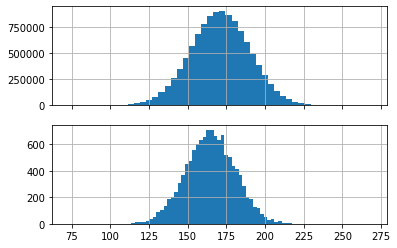

In [8]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(population_men, bins=50)
ax0.grid(True)
ax1.hist(population_women, bins=50)
ax1.grid(True)

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [9]:
sigma = 150
delta = 50
beta = 0.95
alpha = 1 - beta
Z = norm.ppf(1 - alpha/2)
n = round(((sigma * Z) / delta)**2)
print(f'Объем необходимой выборки: {n}')

Объем необходимой выборки: 35


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [10]:
import pandas as pd

observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [11]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта


oddsratio, pvalue = stats.fisher_exact(observations)#Возможно пригодится эта функция.

### Ваш код...
oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

H0: "волшебник" просто угадывает  
H1: "волшебник" действительно предсказывает погоду

In [12]:
alpha = 0.05
if pvalue < alpha:
    print('отвергаем нулевую гипотезу. "волшебник" действительно предсказывает погоду')
else:
    print('не отвергаем нулевую гипотезу. "волшебник" просто угадывает')

не отвергаем нулевую гипотезу. "волшебник" просто угадывает


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [13]:
#Вспомогательная функция для подсчета доверительного интервала
import scipy
import numpy as np

def mean_confidence_interval(data, confidence=0.95):   
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h  #,h

In [14]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

mean_confidence_interval(data, confidence=0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [15]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
t, p = stats.ttest_ind(data_1, data_2)
t, p

(7.35744682757447, 2.1159475572725764e-11)

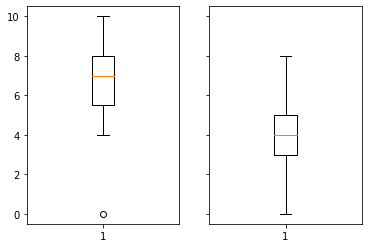

In [16]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax0.boxplot(data_1)
ax1.boxplot(data_2)
plt.show()

Принадлежат ли выборки data_1 и data_2 одному множеству? 
* нет, это видно визуально и на стремящемся к нулю p-value теста Стьюдента

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

### Ваши выводы:
Низкое значени p-value говорит нам о том, что выборки отличаются. Но ничего нельзя сказать о характере распределения по p-value.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [17]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test
t, p = stats.ttest_ind(A, B)
t, p

(-1.95300880485141, 0.051284593140469285)

При каком минимальном p-value различия были бы уже значимы? 
* при p-value < alpha различия были бы уже значимы. В нашем случае alpha = 0.05, т.е. выборки незначительно отличаются

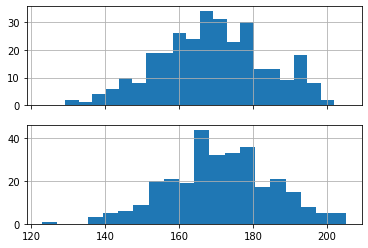

In [18]:
fig, (ax0, ax1) = plt.subplots(2, sharex=True)
ax0.hist(A, bins=20)
ax0.grid(True)
ax1.hist(B, bins=20)
ax1.grid(True)

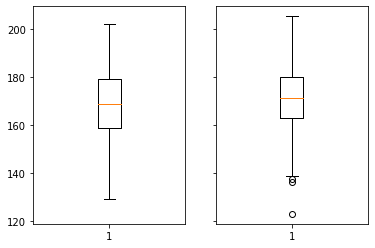

In [19]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)
ax0.boxplot(A)
ax1.boxplot(B)
plt.show()